In [17]:
from tensorboard_extract import convert_tfevent


import os 
import pandas as pd 
import matplotlib.pyplot as plt 

path = 'results'
datasets= ['mnist', 'fashion_mnist', 'cifar10', 'cifar100']

all_dfs = [] 

for data in datasets:
    env_path = os.path.join(path, data)
    configs = os.listdir(env_path)
    for config_name in configs:
        config_path = os.path.join(env_path, config_name)
        event_path =os.path.join(f"{config_path}/runs", [f for f in os.listdir(f"{config_path}/runs") if 'events.' in f][0])
        print(event_path)
        df = convert_tfevent(event_path)
        df = df[df['name'] == 'Valid-ACC']            
        df['data'] = data
        _, seed = config_name.split("_")
        df['seed'] = seed
        all_dfs.append(df)

df = pd.concat(all_dfs)
df = df.reset_index()
df['seed'].astype(int)
df.head()

results/mnist/seed_1/runs/events.out.tfevents.1675992126.Hinton.46679.0
results/mnist/seed_0/runs/events.out.tfevents.1675992005.Hinton.44927.0
results/mnist/seed_2/runs/events.out.tfevents.1675992243.Hinton.47370.0
results/fashion_mnist/seed_1/runs/events.out.tfevents.1675992125.Hinton.46592.0
results/fashion_mnist/seed_0/runs/events.out.tfevents.1675992010.Hinton.45235.0
results/fashion_mnist/seed_2/runs/events.out.tfevents.1675992252.Hinton.47587.0
results/cifar10/seed_1/runs/events.out.tfevents.1675992120.Hinton.46473.0
results/cifar10/seed_0/runs/events.out.tfevents.1675992000.Hinton.44696.0
results/cifar10/seed_2/runs/events.out.tfevents.1675992244.Hinton.47368.0
results/cifar100/seed_1/runs/events.out.tfevents.1675992120.Hinton.46474.0
results/cifar100/seed_0/runs/events.out.tfevents.1675991998.Hinton.44628.0
results/cifar100/seed_2/runs/events.out.tfevents.1675992234.Hinton.47282.0


,index,wall_time,name,step,value,data,seed
0,938,1.675992e+09,Valid-ACC,0,0.9623,mnist,1
1,1877,1.675992e+09,Valid-ACC,1,0.9761,mnist,1
2,2816,1.675992e+09,Valid-ACC,2,0.9808,mnist,1
3,3755,1.675992e+09,Valid-ACC,3,0.9828,mnist,1
4,4694,1.675992e+09,Valid-ACC,4,0.9852,mnist,1


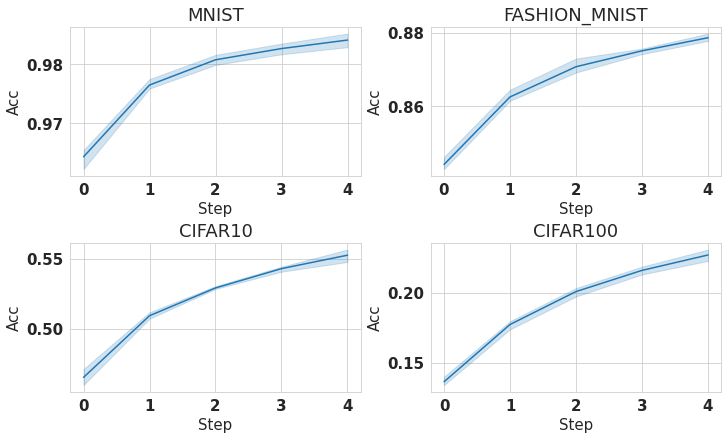

In [23]:
import seaborn as sns 
import matplotlib.cm as  cm 

sns.set_style("whitegrid")
cmap = cm.get_cmap("seismic")

plt.rc('legend', fontsize=16)
plt.rc('font', size=15)
plt.rcParams['text.usetex'] = False

fig = plt.figure(constrained_layout=True, figsize=(10, 6), facecolor="white")
subfigs = fig.subfigures(2, 1, hspace=0.0, height_ratios=[ 1, 1])
axes1 = subfigs[0].subplots(1,2).flat
axes2 = subfigs[1].subplots(1,2).flat

for i, data in enumerate(datasets):
    if 'mnist' in data:
        ax = next(axes1)
    else:
        ax = next(axes2)

    env_df = df[df['data']==data]
    sns.lineplot(x='step', y='value',  data=env_df, ax=ax)
    ax.set_title(data.upper())
    ax.set_xlabel("Step")
    ax.set_ylabel("Acc")
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))    
    
plt.savefig(f"{path}/accuracy.pdf")